In [58]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [59]:
data=pd.read_csv('../input/train.csv')

In [60]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
#checking for total of null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Need to fix the null values in Age and Cabin

How many survived? 
Writing down a code is good but not better for the analysis (We can just count the number of those who survived and those who died). 
A better vizualisation will make the study intersting and not 
boring. That'll help to understand better as well. So let's plot 

In [62]:
data.Survived.value_counts() #"""Not interesting to read"""#

0    549
1    342
Name: Survived, dtype: int64

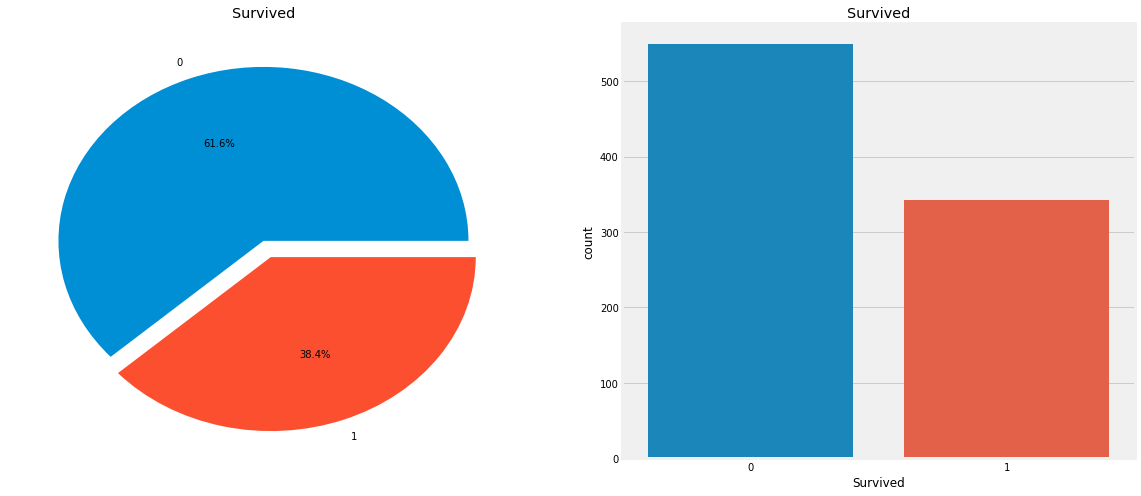

In [63]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

 ## Now this is good but the viz is not good. NEVER SEPARATE THE SLICE FOR PIE CHARTS, NEVER USE 3D CHARTS OR PLOTS, NEVER USE SHADOWS.
 
 For the slice, it is because of 'explode=[0,0.1]', so we will remove that argument to have a better presentation


# A BETTER VIZ

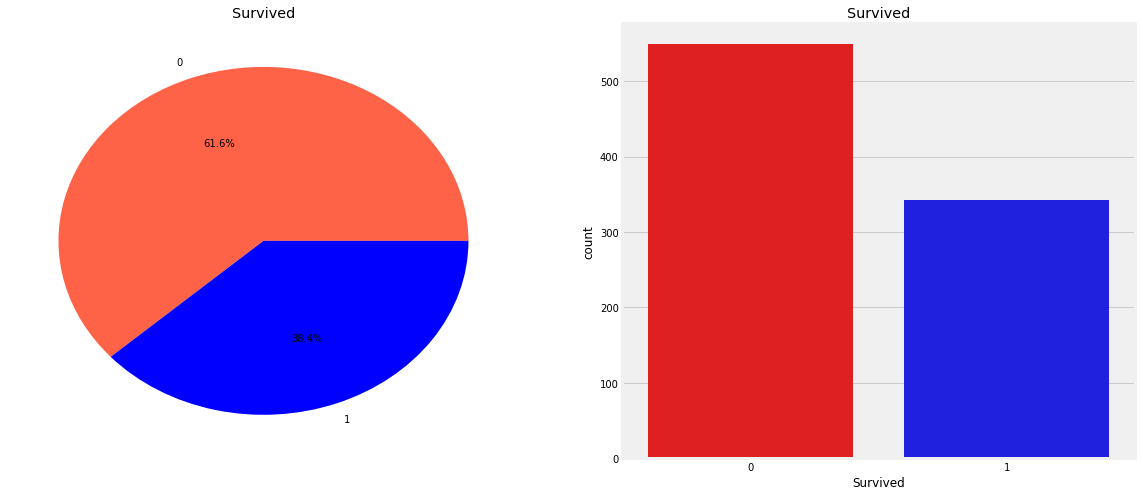

In [64]:
colors = ['red','blue']
f,ax=plt.subplots(1,2,figsize=(18,8)) # we avoid using 'explode' to get rid of the little gap in the pieplot
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0], colors = ['tomato','blue'], shadow=False)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1], palette = colors)
ax[1].set_title('Survived')
plt.show()

We can see that 38.4% of the people in the training set survived (only 342 out of 891)

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

First let us understand the different types of features.

## Types Of Features

## Categorical Features:

A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as $\bf Nominal Variables$.

$\bf Example$: Sex and Embark

## Ordinal Features:

An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like $\bf Height$ with values $\bf Tall$, $\bf Medium$, $\bf Short$, then Height is a ordinal variable. Here we can have a relative sort in the variable.

## Continous Feature:

A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

$\bf Continous~Features~in~the dataset$: Age

# Analysing the features

In [65]:
data.groupby(['Sex', 'Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

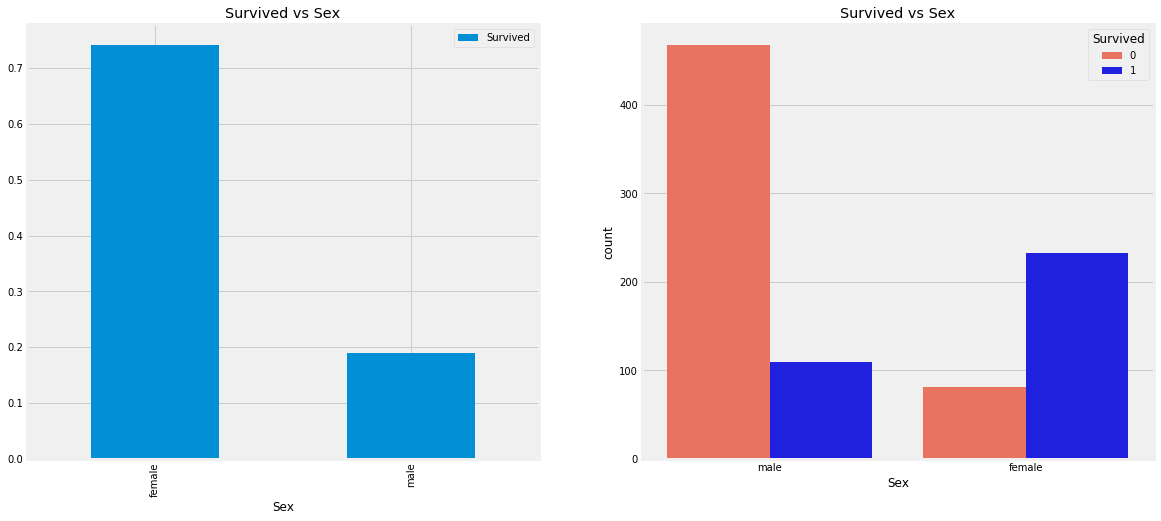

In [66]:
colors = ['tomato', 'blue']
f, ax = plt.subplots(1,2, figsize =(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived',data = data, ax = ax[1], palette = colors) #hue le mamoaka anle legend 'survived'=1 / 0
ax[1].set_title('Survived vs Sex')
plt.show()

### From the first plot:

There are lots of men in the ship but the rate of survival from women are about the double of men's. About 75% of women survived whereas only 18-19% did.

### PClass--> ordinal features

In [67]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### 62% of the first class survived (out of 216), 47% of the second class survived (out of 184), while only 24% of the third class survived (out of 491).
"Seems like the class of a person played a role within the survival, priority is given to the wealthiest group? "

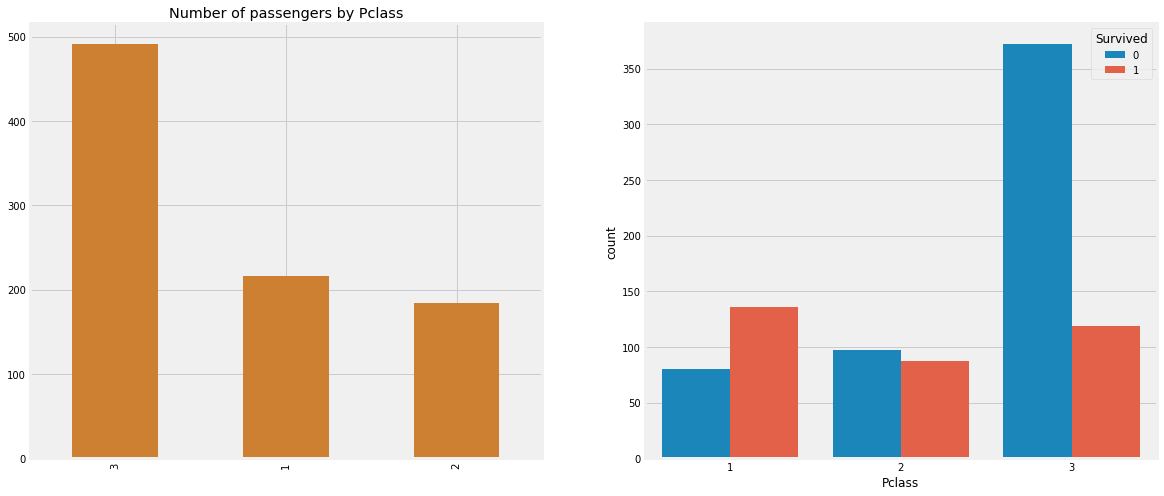

In [68]:
f, ax = plt.subplots(1,2, figsize = (18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of passengers by Pclass')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])

In [69]:
pd.crosstab(data.Pclass, data.Sex, data.Survived, margins= True).style.background_gradient(cmap = 'summer_r')

ValueError: values cannot be used without an aggfunc.

In [70]:
pd.crosstab( [data.Sex, data.Survived], data.Pclass, margins= True).style.background_gradient(cmap = 'summer_r')

Majority of women were rescued comparing to men and the money is for something too.
Actually, from the first class, the 42% saved were women and only 20% were men.

In the second class, 38% women and 9% men. 

As for the third one, only 15% of women were saved whereas only 9% were men.

TypeError: Argument 'obj' has incorrect type (expected list, got DataFrame)

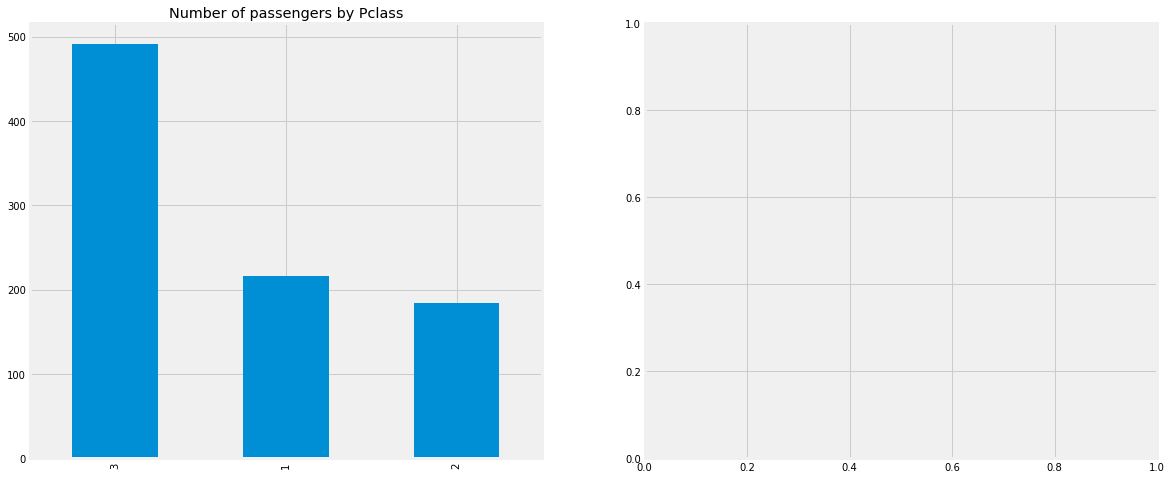

In [71]:
#This does not work, we need a factor plot
fig, ax =plt.subplots(1,2, figsize = (18,8))
data['Pclass'].value_counts().plot.bar(ax=ax[0]) 
ax[0].set_title('Number of passengers by Pclass')
sns.countplot(['Pclass','Sex'], hue='Survived', data=data, ax = ax[1])

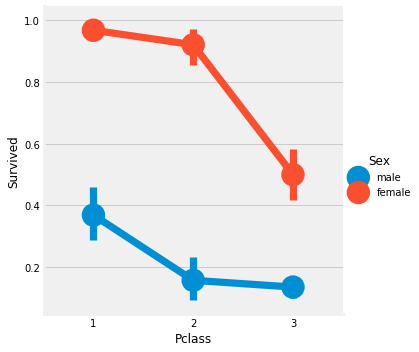

In [72]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)

We use FactorPlot in this case, because they make the seperation of categorical values easy.

Looking at the $\bf CrossTab$ and the $\bf FactorPlot$, we can easily infer that survival for $\bf Women ~from ~Pclass~1$ is about $\bf 95$-$\bf96\%$, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

so far, it looks like $\bf{Pclass}$ and $\bf Sex$ are $\bf important~features$. We need to explore further

NameError: name 'female_survived' is not defined

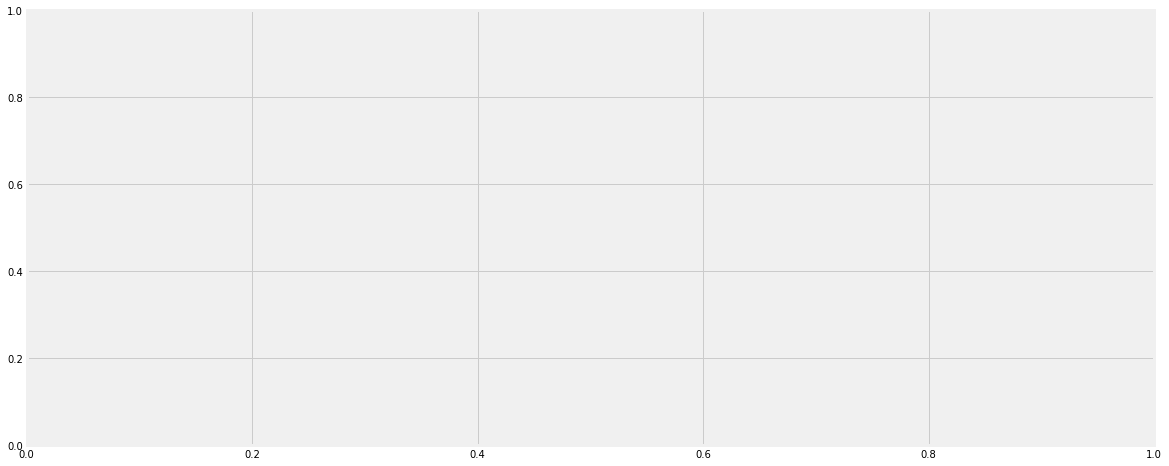

In [73]:
f, ax = plt.subplots(1,figsize=(18,8))
female_survived.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0], colors = ['tomato','blue'], shadow=False)
ax 

## Age -> Continous feature

In [74]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


Text(0.5,1,'Survived vs Age')

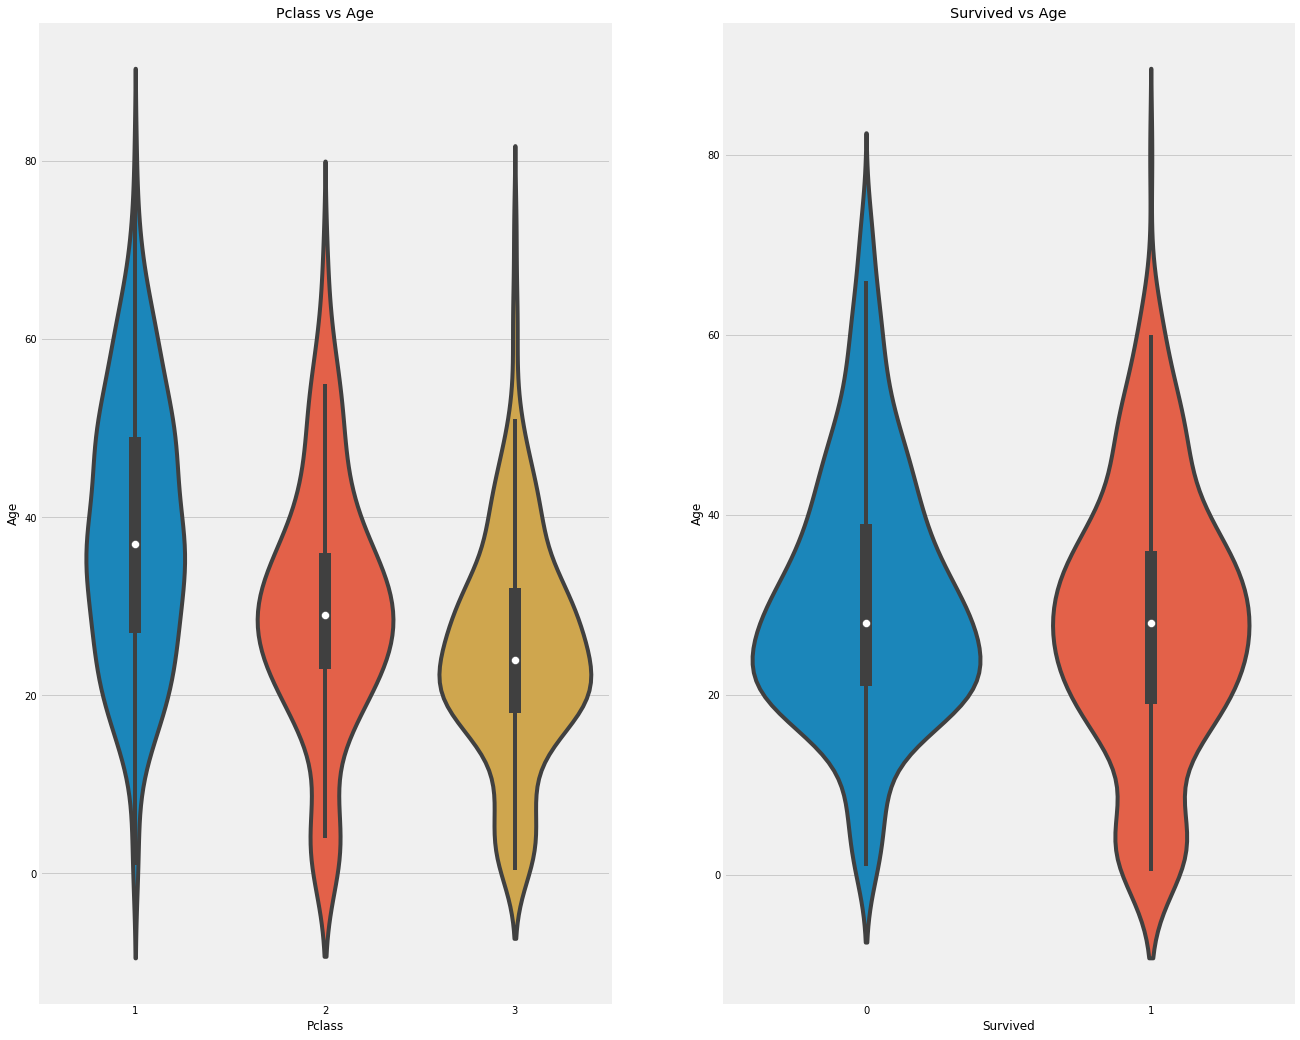

In [75]:
f, ax = plt.subplots(1,2, figsize = (20,18))
sns.violinplot(data.Pclass, data.Age, ax = ax[0])
ax[0].set_title("Pclass vs Age")
sns.violinplot(data.Survived, data.Age, ax = ax[1])
ax[1].set_title("Survived vs Age")

We can combine these graph as well

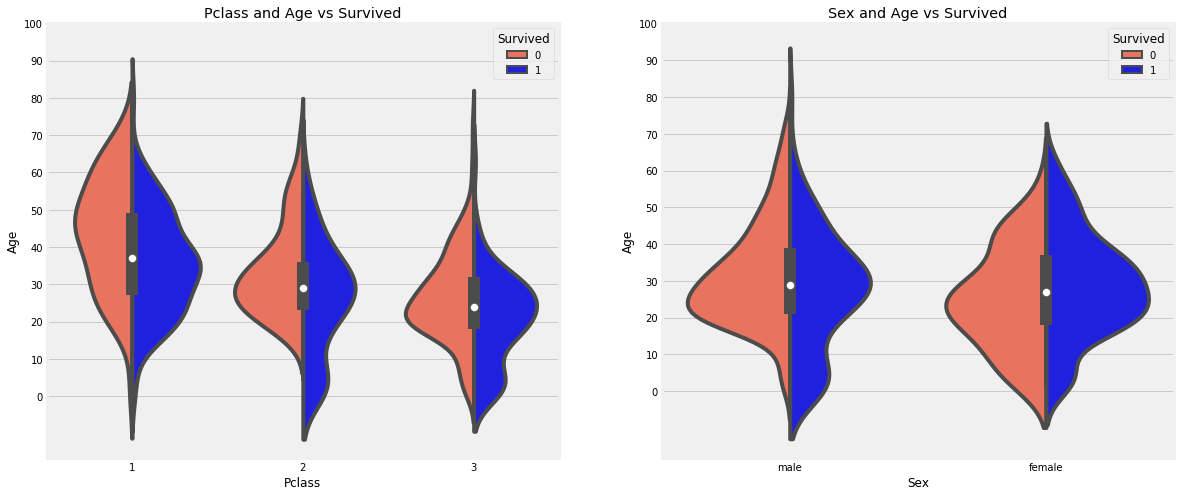

In [80]:
f, ax = plt.subplots(1,2, figsize =(18, 8))
colors =['tomato',"blue"]
#sns.violinplot(data.Pclass, data.Age, hue=data.Survived, split=True , ax = ax[0])
#this is the same as '
sns.violinplot("Pclass", "Age", hue="Survived", data= data, palette= colors, split=True , ax = ax[0])
ax[0].set_yticks(range(0,110,10))
ax[0].set_title("Pclass and Age vs Survived")
sns.violinplot("Sex", "Age", hue="Survived", data = data, palette=colors, split=True, ax= ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

# Observations

1- As Pclass increases, the number of children saved are increasing the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2-Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women.

3-For males, the survival chances decreases with an increase in age.

### We have 177 null values in Age and we need to fix this. To do that we can assign the average age value to each null or nan value. 
However, one issue stands out. What if we assign the average of 29 to a 4 years old child? That would affect our analysis.
So, to deal with that, we are going to use the "Title" from the Name feature and fill each category to their respective mean.

In [22]:
data['Initials'] = 0
for i in data:
    data['Initials'] = data.Name.str.extract('([A-Za-z]+)\.') # to extract the salutation value

Okay so here we are using the Regex: [A-Za-z]+).. So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the Initials from the Name.

Here we do $\bf feature~ creating$ from $\bf Name$

In [23]:
pd.crosstab(data.Survived, data.Initials, margins = True).style.background_gradient(cmap='summer_r')

Initials,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Survived,,,,,,,,,,,,,,,,,,
0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0,549
1,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,342
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [24]:
pd.crosstab(data.Initials, data.Sex, margins = True).T.style.background_gradient(cmap = 'summer_r')

Initials,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [25]:
data['Initials'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace = True)

In [26]:
pd.crosstab(data.Initials, data.Sex, margins = True).T.style.background_gradient(cmap = 'summer_r')

Initials,Master,Miss,Mr,Mrs,Other,All
Sex,,,,,,
female,0,186,1,127,0,314
male,40,0,528,0,9,577
All,40,186,529,127,9,891


## Filling the NAN in Ages

In [27]:
data.groupby('Initials')['Age'].mean()

Initials
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [28]:
data.loc[(data.Age.isnull()) & (data.Initials == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initials == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initials == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initials == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initials == 'Other'), 'Age'] = 46

In [29]:
data.Age.isnull().any()

False

Text(0.5,1,'Survived = 1')

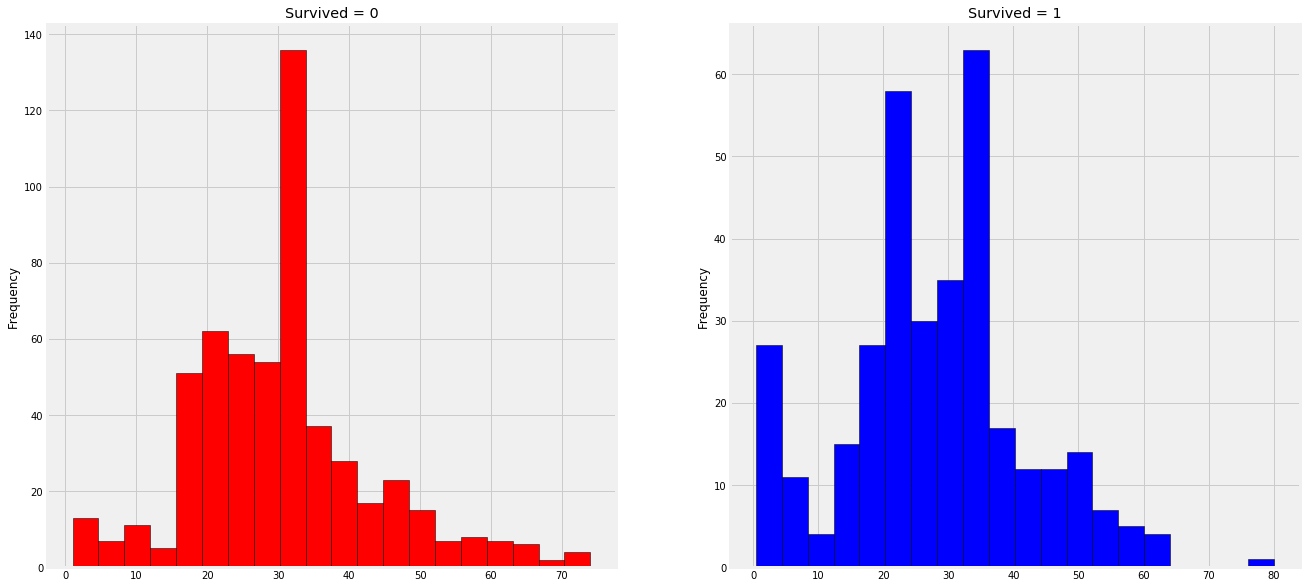

In [30]:
f, ax = plt.subplots(1,2, figsize = (20,10))
data[data['Survived'] == 0].Age.plot.hist(ax =ax[0], bins = 20, color = 'red', edgecolor = 'black')
ax[0].set_title('Survived = 0')
#ax[0].set_range(0,80,5)
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins = 20, color = 'blue', edgecolor = 'black')
ax[1].set_title('Survived = 1')

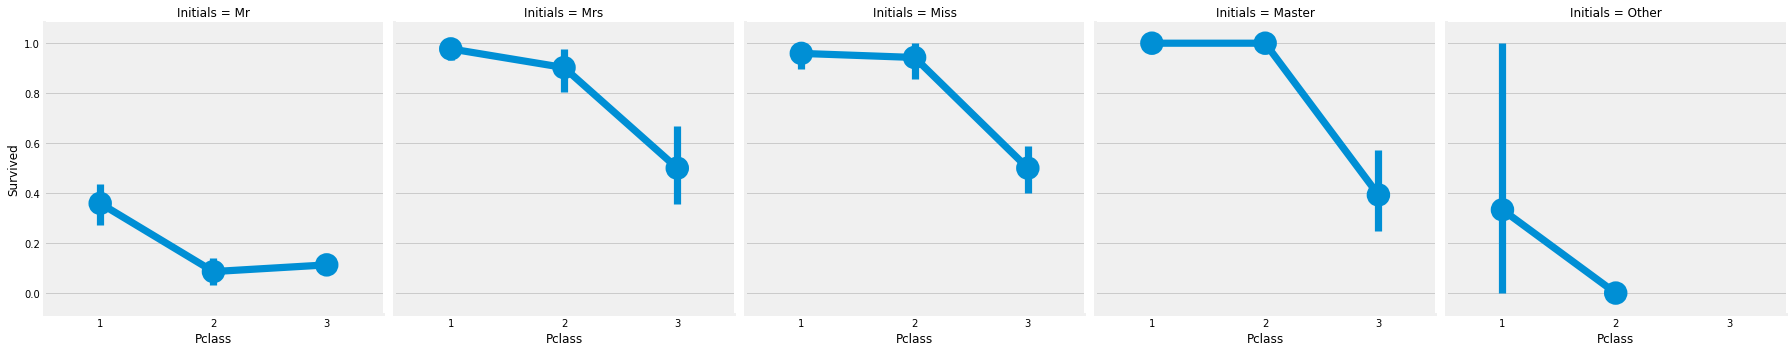

In [31]:
sns.factorplot('Pclass','Survived',col='Initials',data=data)

## Embarked -> Categorical variable

In [32]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient('summer_r')

Port of embarkation seem to have impact on the survival.

## Let's delve into the chance of survival by port of embarkation

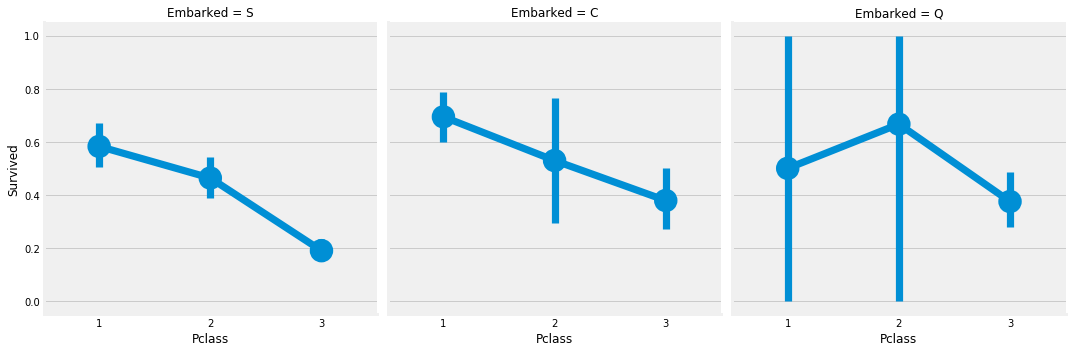

In [33]:
sns.factorplot('Pclass', 'Survived', col = 'Embarked', data = data)

much better viz :

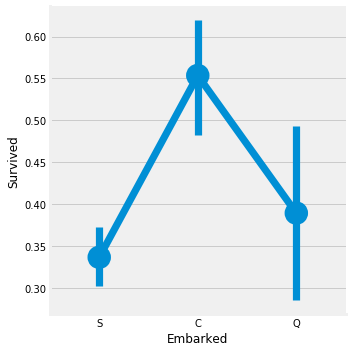

In [34]:
sns.factorplot('Embarked','Survived', data = data)

The chance of survival for port C is the highest, around 0.55 while S is the lowest with 0.35. 

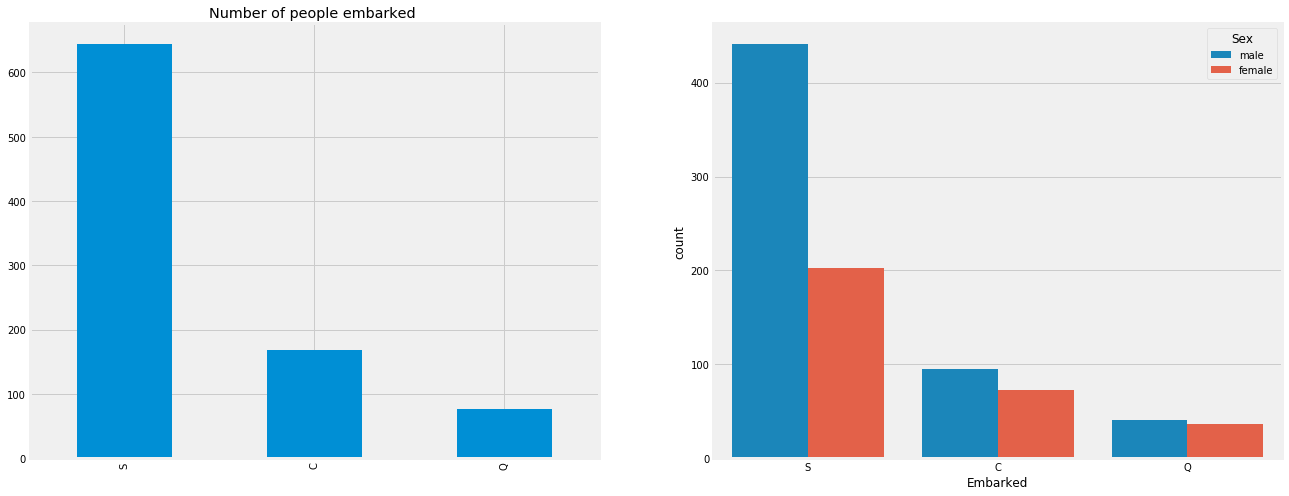

In [35]:
f, ax = plt.subplots(1,2, figsize = (20,8))
data.Embarked.value_counts().plot.bar(ax = ax[0])
ax[0].set_title("Number of people embarked ")
sns.countplot('Embarked', hue = 'Sex', data=data, ax=ax[1])

 sns.countplot is much better than the plot.bar

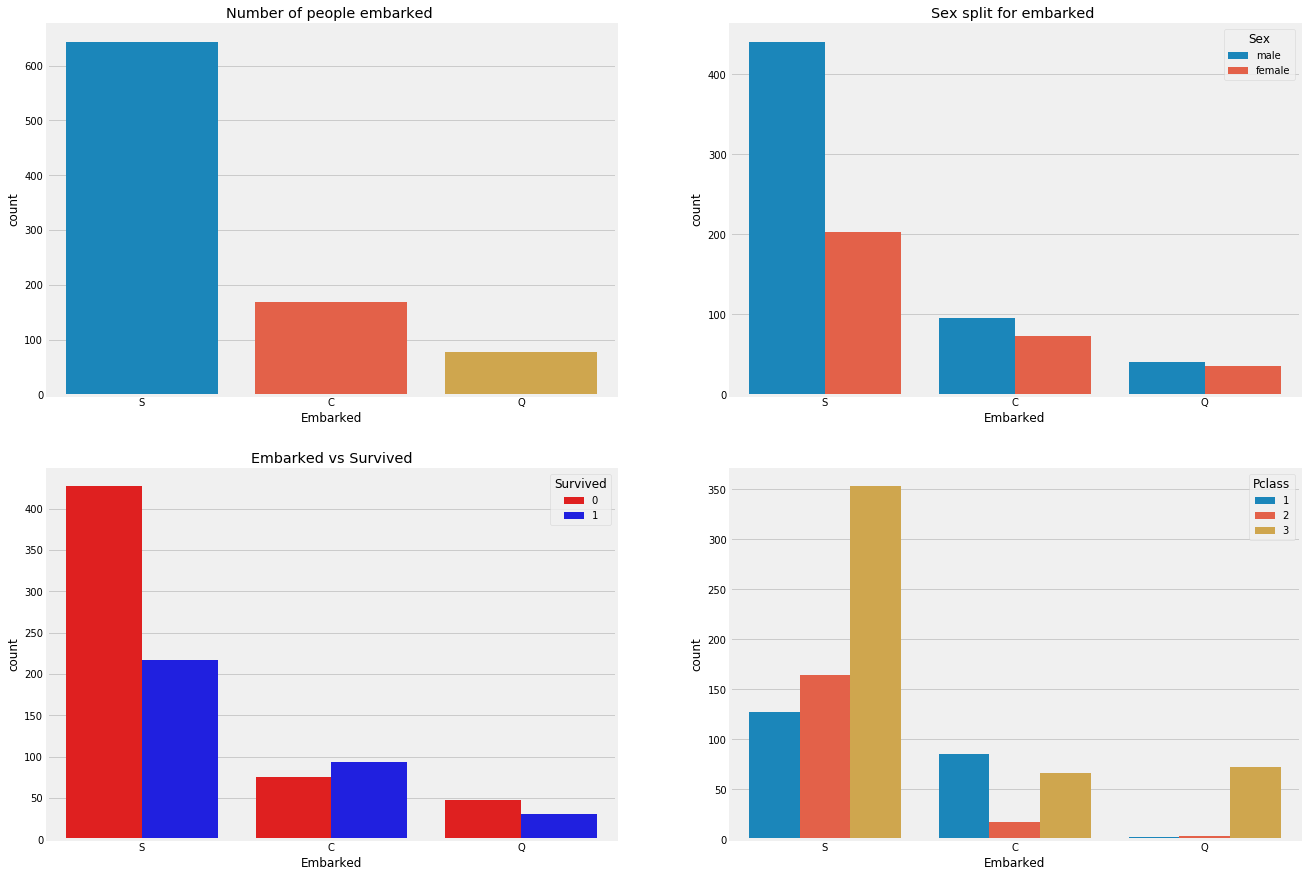

In [36]:
colors = ['red','blue']
f, ax = plt.subplots(2,2, figsize = (20, 15))
sns.countplot('Embarked', data = data , ax = ax[0,0])
ax[0,0].set_title("Number of people embarked ")
sns.countplot('Embarked', hue = 'Sex', data = data, ax = ax[0,1])
ax[0,1].set_title("Sex split for embarked ")
sns.countplot('Embarked', hue = 'Survived', data = data, palette = colors, ax = ax[1,0])
ax[1,0].set_title("Embarked vs Survived")
sns.countplot('Embarked', hue = 'Pclass', data =data , ax = ax[1,1])

1)Maximum passenegers boarded from S. Majority of them being from Pclass3.

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

4)Port Q had almost 95% of the passengers were from Pclass3.